In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-menu/starbucks_drinkMenu_expanded.csv
/kaggle/input/starbucks-menu/starbucks-menu-nutrition-drinks.csv
/kaggle/input/starbucks-menu/starbucks-menu-nutrition-food.csv


In [59]:
df=pd.read_csv("/kaggle/input/starbucks-menu/starbucks-menu-nutrition-drinks.csv")
df.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [60]:
#renaming column 1 as drink_name
df.rename(columns={"Unnamed: 0":"drink_name"},inplace=True)

In [61]:
df.head()

,drink_name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [62]:
#number of unique drinks in starbucks
len(df["drink_name"].unique())

154

In [63]:
# replacing "-" with NaN
df.replace({"-":None},inplace=True)
df.head()

,drink_name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,None,None,None,None,None,None
2,Pink Drink,None,None,None,None,None,None
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [64]:
#checking null values
df.isnull().sum()

drink_name     0
Calories      85
Fat (g)       85
Carb. (g)     85
Fiber (g)     85
Protein       85
Sodium        85
dtype: int64

In [65]:
# Since we cant assume values for the all these columns, we will delete the missing values
df.dropna(inplace=True)

In [70]:
# checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   drink_name  92 non-null     object
 1   Calories    92 non-null     object
 2   Fat (g)     92 non-null     object
 3   Carb. (g)   92 non-null     object
 4   Fiber (g)   92 non-null     object
 5   Protein     92 non-null     object
 6   Sodium      92 non-null     object
dtypes: object(7)
memory usage: 5.8+ KB


In [72]:
#converting data type to float as they are numbered values
for i in df.columns[1:]:
    df[i]=df[i].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drink_name  92 non-null     object 
 1   Calories    92 non-null     float64
 2   Fat (g)     92 non-null     float64
 3   Carb. (g)   92 non-null     float64
 4   Fiber (g)   92 non-null     float64
 5   Protein     92 non-null     float64
 6   Sodium      92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


# **Analyzing calories in drinks**

In [76]:
# Drinks with maximum calories
calories=df.sort_values(by="Calories",ascending=False)
calories.head()

,drink_name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
110,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
139,White Chocolate Mocha,360.0,11.0,53.0,0.0,14.0,240.0
146,Cinnamon Dolce Frappuccino® Blended Coffee,350.0,4.5,64.0,0.0,15.0,0.0
172,Chocolate Smoothie,320.0,5.0,53.0,8.0,20.0,170.0
109,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0


In [77]:
#drinks with minimum calories
calories.tail(5)["drink_name"]

99               Featured Dark Roast
98           Decaf Pike Place® Roast
94                      Blonde Roast
103    Nariño 70 Cold Brew with Milk
9                        Iced Coffee
Name: drink_name, dtype: object

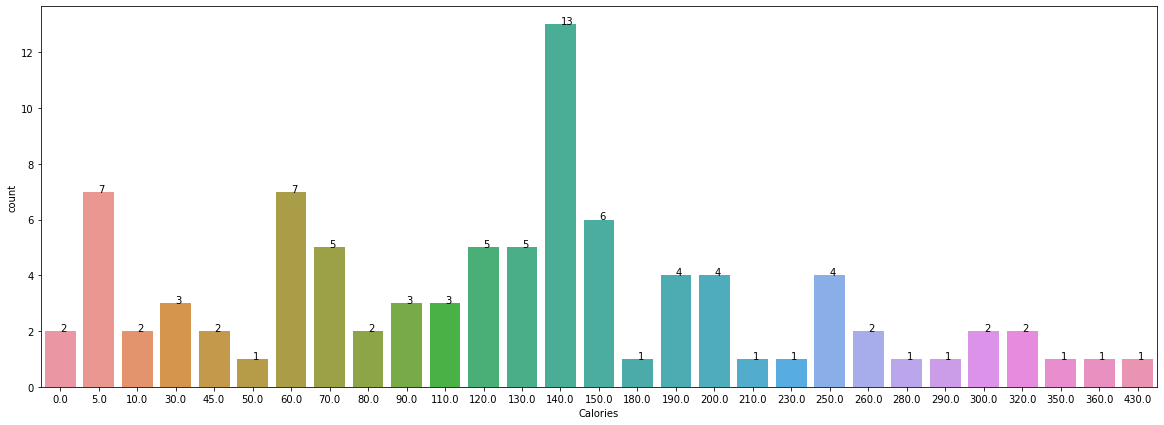

In [80]:
# maximum calories count
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,7))
cp=sns.countplot(calories["Calories"])
for i in cp.patches:
    plt.annotate(str(int(i.get_height())),
                 xy=[i.get_x()+i.get_width()/2,i.get_height()])
plt.show()

**Observations:**
There are 13 drinks which have calories count as 140.

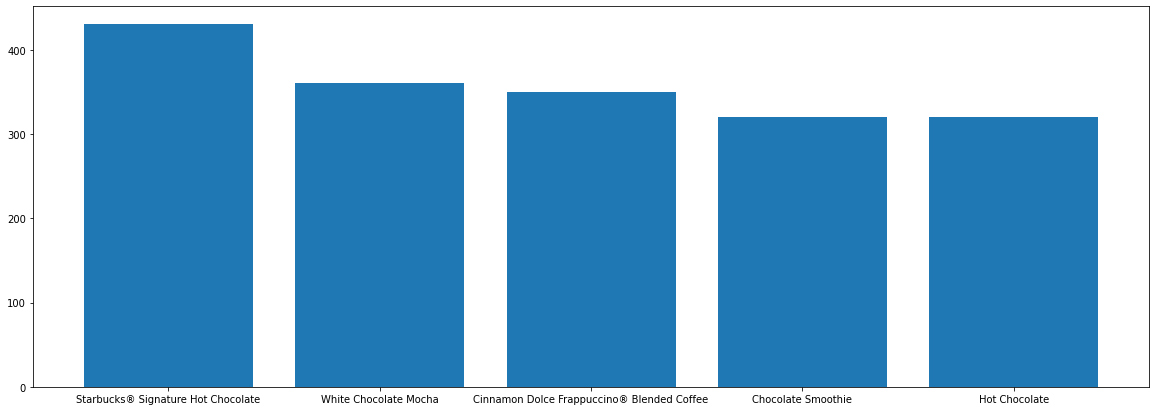

In [82]:
#visualizing drinks with maximum calories
plt.figure(figsize=(20,7))
plt.bar(calories["drink_name"].head(5),height=calories["Calories"].head(5))
plt.show()

**Observation:**
Starbucks' hot chocolate has the maximum amount of calories.

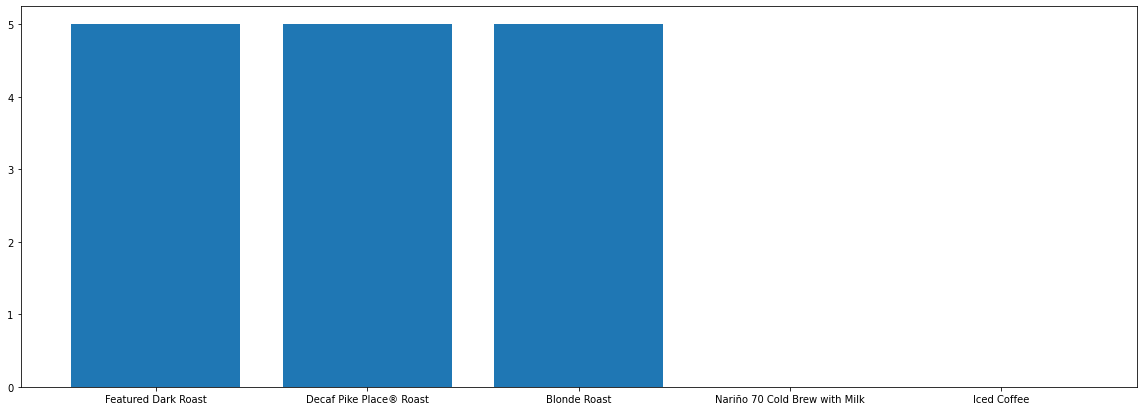

In [83]:
#visualizing drinks with minimum calories
plt.figure(figsize=(20,7))
plt.bar(calories["drink_name"].tail(5),height=calories["Calories"].tail(5))
plt.show()

**Observation:**
Since the data is missing for nitro cold brew and iced coffee, It cant be guaranteed that they have the least calories.

# **Analyzing fat content**

In [84]:
# fat content data
fat=df.sort_values(by="Fat (g)",ascending=False)
fat.head()

,drink_name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
110,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
139,White Chocolate Mocha,360.0,11.0,53.0,0.0,14.0,240.0
118,Coconutmilk Mocha Macchiato,250.0,9.0,32.0,0.0,12.0,180.0
129,Iced Coconutmilk Mocha Macchiato,260.0,9.0,34.0,0.0,11.0,180.0
109,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0


In [85]:
#drinks with minimum fat
fat.tail(5)["drink_name"]

55         Starbucks Refreshers™ Raspberry Pomegranate
38                Teavana® Shaken Iced Peach Green Tea
37    Teavana® Shaken Iced Passion Tango™ Tea Lemonade
36             Teavana® Shaken Iced Passion Tango™ Tea
84                Tazo® Bottled Organic Black Lemonade
Name: drink_name, dtype: object

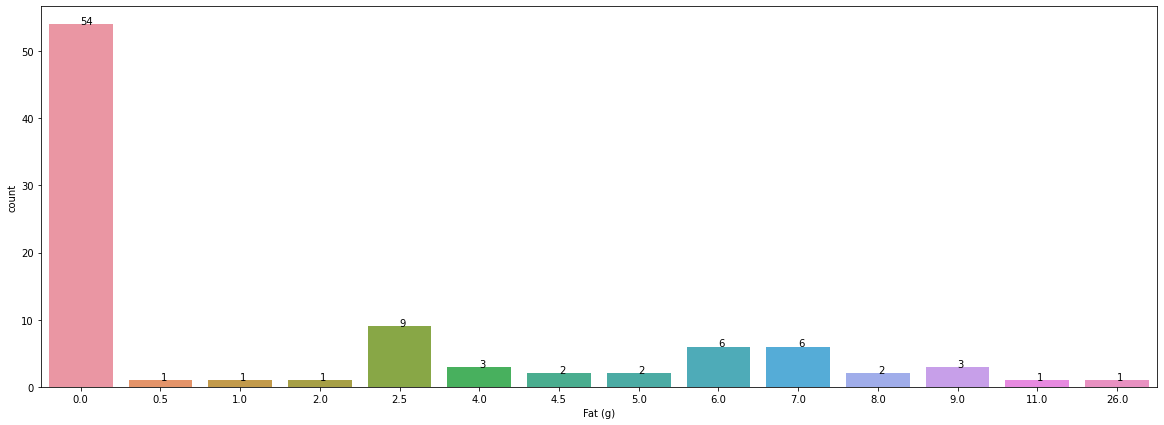

In [86]:
# maximum fat count
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,7))
cp=sns.countplot(fat["Fat (g)"])
for i in cp.patches:
    plt.annotate(str(int(i.get_height())),
                 xy=[i.get_x()+i.get_width()/2,i.get_height()])
plt.show()

**Observations:**
There are 54 drinks with 0 fat content.


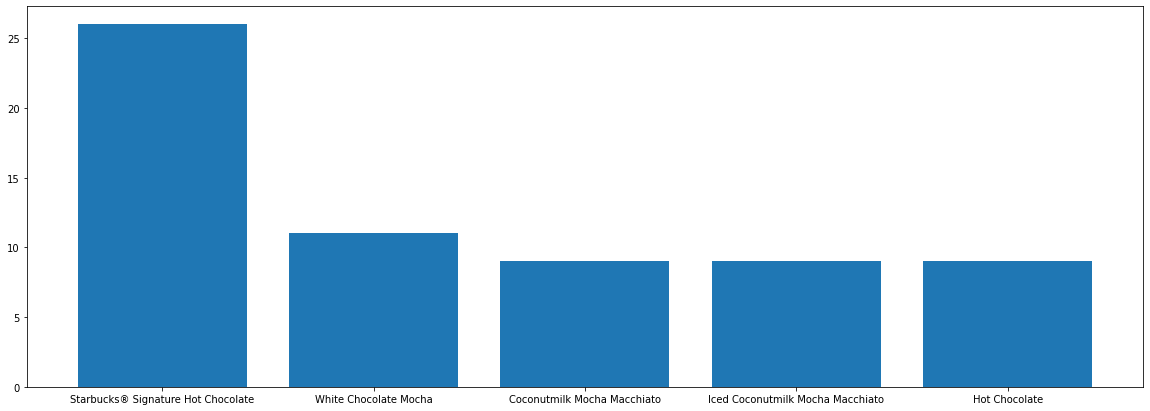

In [87]:
#visualizing drinks with maximum fat
plt.figure(figsize=(20,7))
plt.bar(fat["drink_name"].head(5),height=fat["Fat (g)"].head(5))
plt.show()

# **Observation:**
Again,the hot chocolate has the highest fat content.


# **Generalizing the code for other columns**

In [98]:
def analyze_drink(col_name):
    data=df.sort_values(by=col_name,ascending=False)
    print(f"The drinks with maximum {col_name} are \n{data.head(5)['drink_name']}")
    print(f"\n\nThe drinks with minimum {col_name} are \n{data.tail(5)['drink_name']}")
   
    plt.figure(figsize=(20,7))
    plt.title(f"Count plot for {col_name}")
    cp=sns.countplot(data[col_name])
    for i in cp.patches:
        plt.annotate(str(int(i.get_height())),
                     xy=[i.get_x()+i.get_width()/2,i.get_height()])
    plt.show()
    
    print("\n\n")
    plt.figure(figsize=(20,7))
    plt.title(f"Drinks with maximum {col_name}")
    plt.bar(data["drink_name"].head(5),height=data[col_name].head(5))
    plt.show()

The drinks with maximum Protein are 
172                              Chocolate Smoothie
69            Starbucks® Doubleshot Protein Vanilla
68     Starbucks® Doubleshot Protein Dark Chocolate
173                             Strawberry Smoothie
146      Cinnamon Dolce Frappuccino® Blended Coffee
Name: drink_name, dtype: object


The drinks with minimum Protein are 
55         Starbucks Refreshers™ Raspberry Pomegranate
38                Teavana® Shaken Iced Peach Green Tea
37    Teavana® Shaken Iced Passion Tango™ Tea Lemonade
36             Teavana® Shaken Iced Passion Tango™ Tea
84                Tazo® Bottled Organic Black Lemonade
Name: drink_name, dtype: object


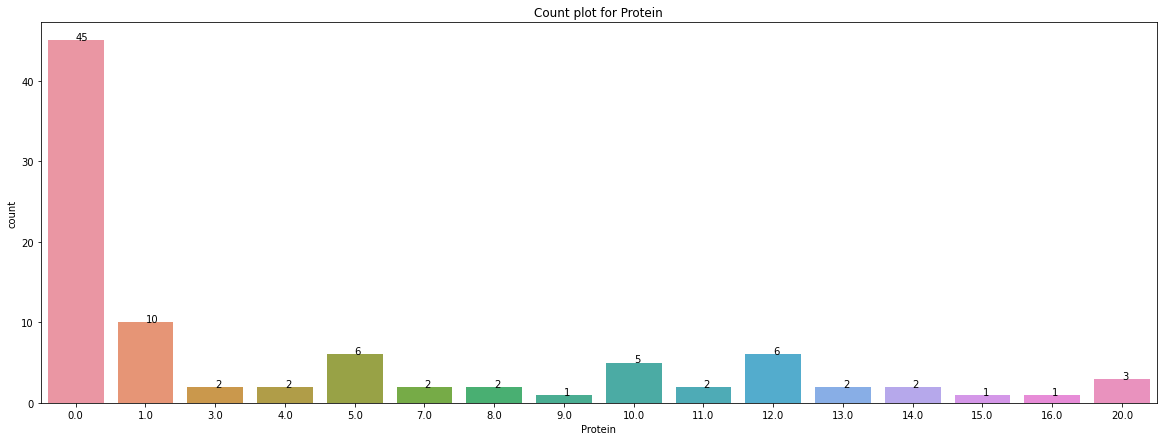

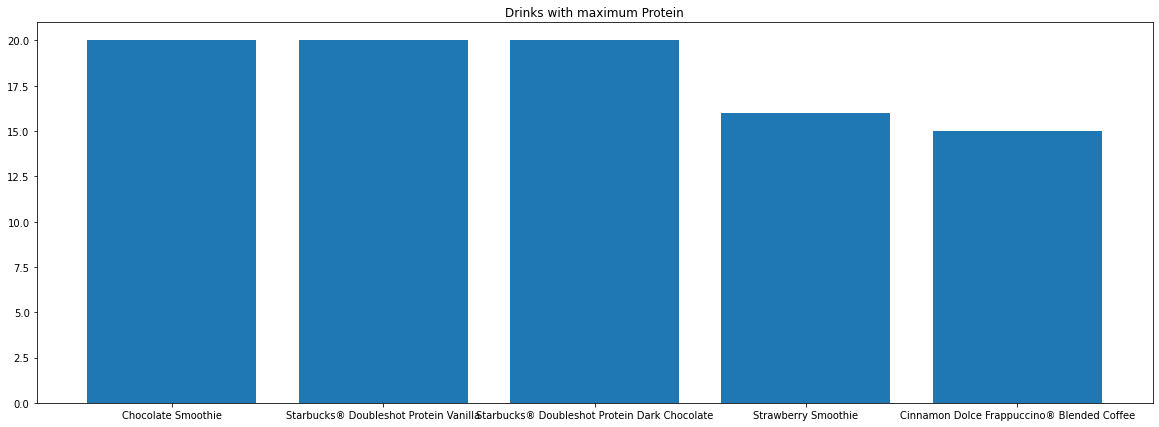

In [99]:
analyze_drink("Protein")

# **Analyzing relationships between columns**

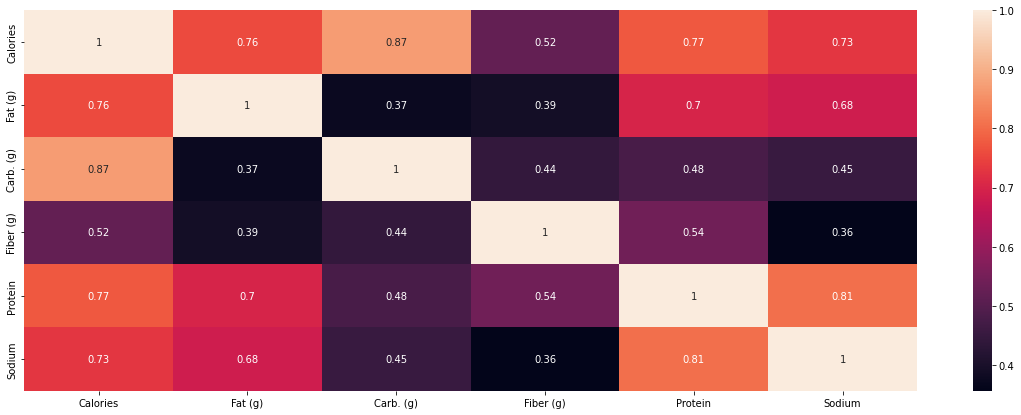

In [100]:
plt.figure(figsize=(20,7))
sns.heatmap(df.iloc[:,1:].corr(),annot=True)
plt.show()

# **Observations:**
Calories as seen have a good relationship with all other columns.


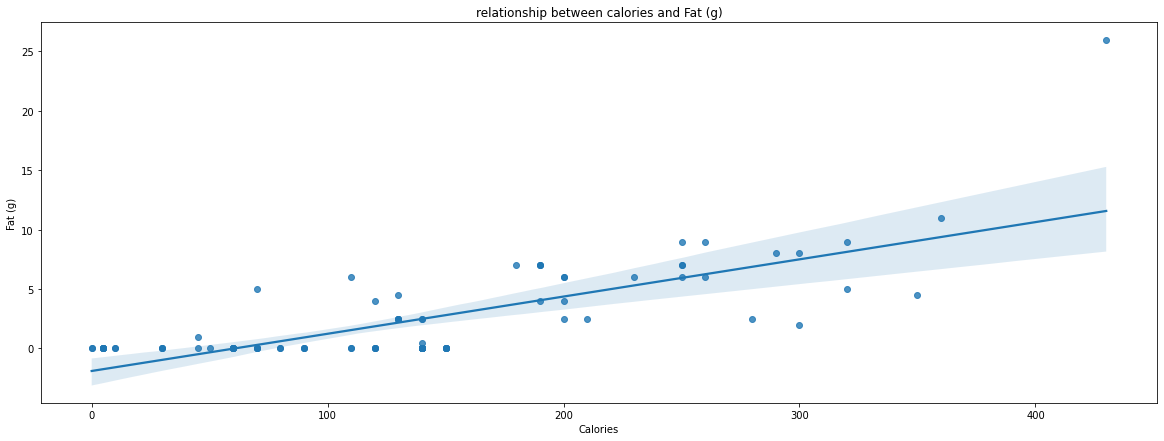

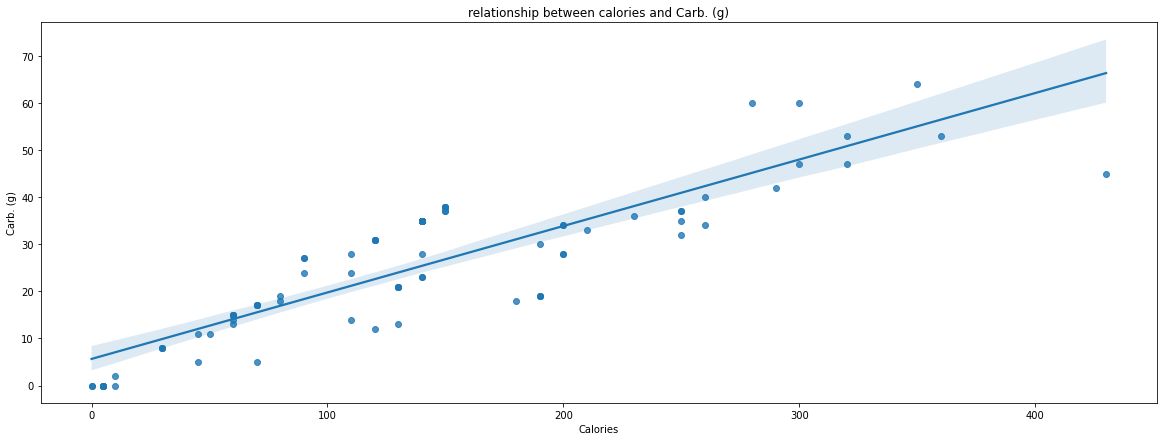

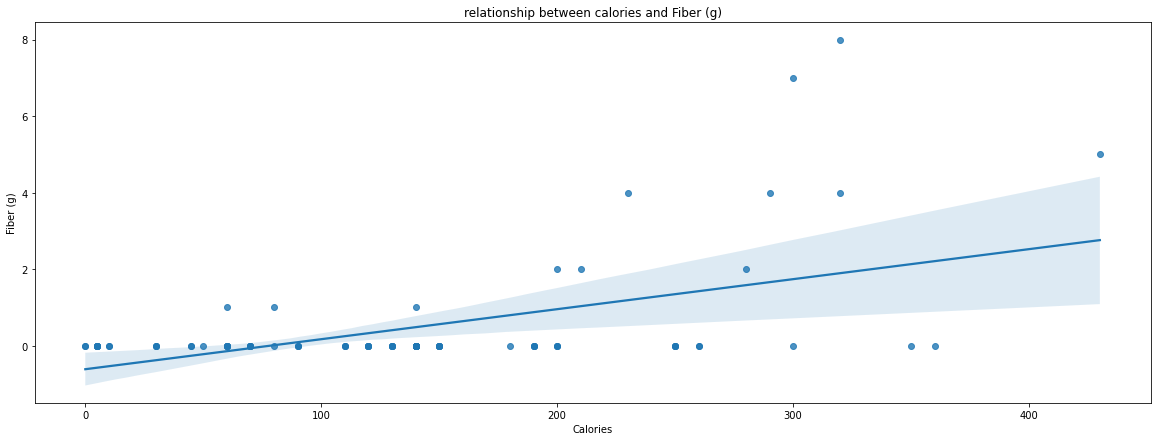

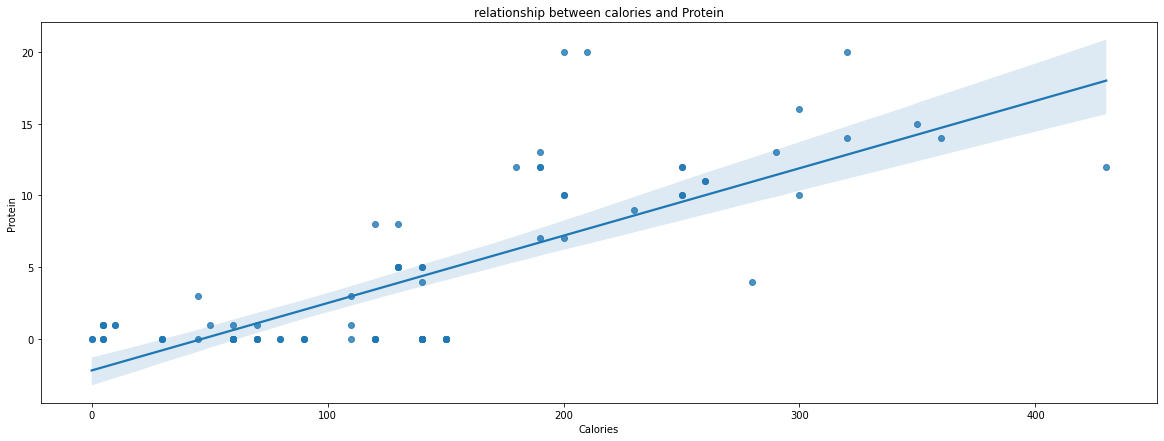

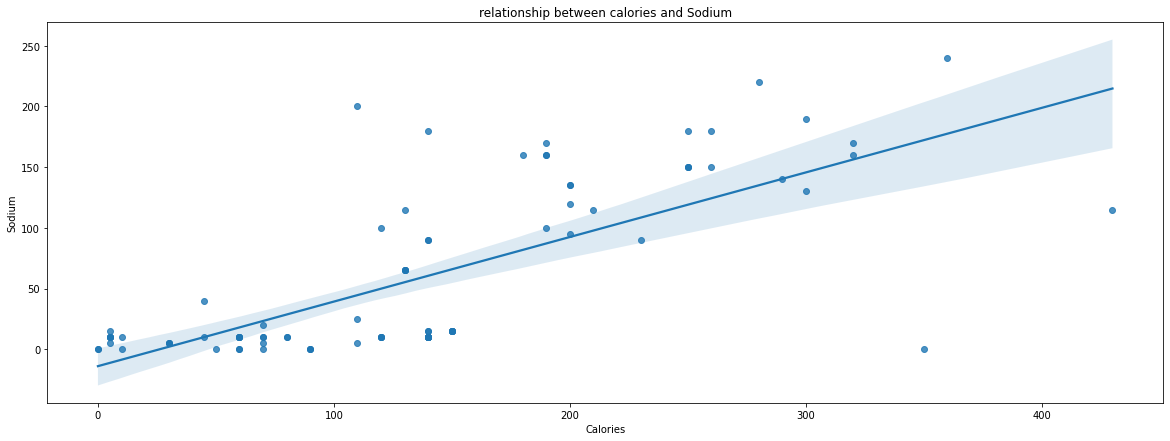

In [106]:
for i in df.columns[2:]:
    plt.figure(figsize=(20,7))
    plt.title(f"relationship between calories and {i}")
    sns.regplot(df["Calories"],df[i])
    plt.show()
    print()

# **Linear Regression model for predicting calories with other columns**

In [107]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,2:]
y=df["Calories"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9976945163094568

In [110]:
y_pred=lr.predict(X_test)
y_pred

array([151.63144897,  34.02447127,   6.58806511, 125.48843225,
        46.00197874,  34.02447127,  61.6106392 , 116.56082549,
       151.63144897,  69.41496943, 364.17102448, 229.48215375,
       204.76197862, 112.58027658, 139.92495362,   2.53613823,
       124.04528105,  61.06861496, 139.65394151, 190.49409594,
       124.04528105, 241.31498137, 298.73387027, 135.7756937 ,
       107.89459635, 139.65394151, 280.05869414, 255.91089901])

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("r2 score:",r2_score(y_test,y_pred))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))

r2 score: 0.9930911226865387
Mean absolute error: 4.432170080356565
Mean squared error: 55.84734577338044


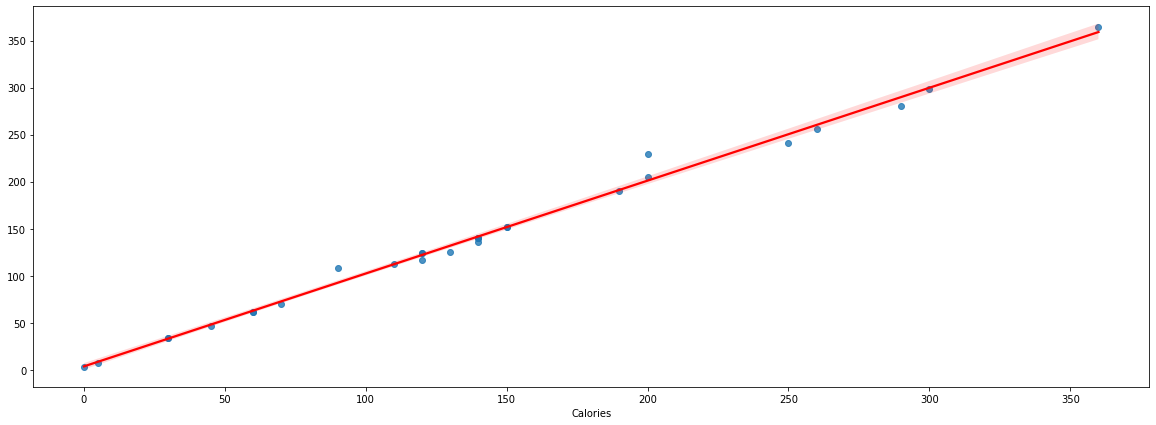

In [115]:
plt.figure(figsize=(20,7))
sns.regplot(y_test,y_pred,line_kws={"color":"red"})
plt.show()

# **Observation:**
The calories for the drinks in starbucks has a good relationship with protein,carbs and fats. But this data is small enough to rely.